In [1]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
from scipy.stats import norm

In [2]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
facial_vectors = pd.read_csv("facial_features1.csv")

In [46]:
len(facial_vectors)

1009

In [47]:
facial_vectors

,1.08456,-0.508257,-0.455205,-0.801591,1.09417,0.56448,1.1031,-0.245884,-0.410708,-0.0727598,...,-0.478358,0.250359,0.566895,0.574306,1.53257,-0.820876,0.463847,-0.806446,0.649095,-0.0143414
0,0.287318,-0.364749,-0.517456,-0.889832,1.047300,0.507089,1.131200,0.126532,-0.176162,-0.182538,...,-0.266360,0.061273,0.308285,0.396795,1.081840,-0.733852,0.108946,-0.653320,0.468011,0.217705
1,0.967631,-0.327111,0.064151,-0.382737,1.226340,0.500175,1.188620,0.283117,-0.235675,0.031235,...,-0.500797,-0.167972,0.426948,0.758543,1.264890,-0.626186,0.338228,-0.877881,0.690759,0.188867
2,0.565197,-0.296782,0.634991,-1.219300,1.064270,1.460020,1.804640,-0.069539,-0.509818,-0.657412,...,-0.800066,0.421139,-0.002661,0.325054,1.279250,-0.628920,-0.038952,-1.086000,0.520084,0.561391
3,0.987987,0.340660,-0.219261,-0.438323,1.126020,0.699578,1.208940,-0.201788,-0.270052,-0.333164,...,-0.747960,-0.169893,0.604988,0.527408,1.260970,-0.666706,0.364788,-0.880390,0.527095,0.371026
4,0.023911,-0.155015,0.315314,-0.668824,1.316030,0.730888,1.359390,-0.153980,-0.182559,-0.752822,...,-0.812468,-0.123589,0.499489,0.480418,1.221790,-0.437561,0.551060,-1.100790,0.598895,0.205693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,1.163370,-0.022884,0.053772,-1.631440,1.207240,0.689667,-0.641151,-0.816173,-1.169420,0.373586,...,0.039846,0.020752,1.328950,0.208112,0.473348,0.147952,-0.684114,-1.448950,-0.570554,0.938161
1005,1.263030,-0.091061,-0.037273,-1.818480,1.643770,0.213436,-0.838224,-0.883715,-0.751111,0.303964,...,0.281505,0.221361,0.749394,0.267123,0.137590,0.389214,-0.903995,-1.147530,-0.618815,1.046870
1006,0.706957,-0.033671,0.400566,-1.064430,0.348999,0.876412,-0.496096,-0.931201,-1.603050,0.130205,...,0.347813,0.559629,1.859170,0.707230,0.943649,0.290071,-1.480620,-1.123930,-0.111960,0.089116
1007,0.427609,-0.776042,-0.270973,-1.067540,0.446100,1.050080,-0.496228,-0.647690,-1.230310,-0.018208,...,0.106417,0.751200,1.250320,0.175038,1.087360,0.696707,-1.481640,-1.073880,-0.755069,0.587772


In [26]:
rs = []

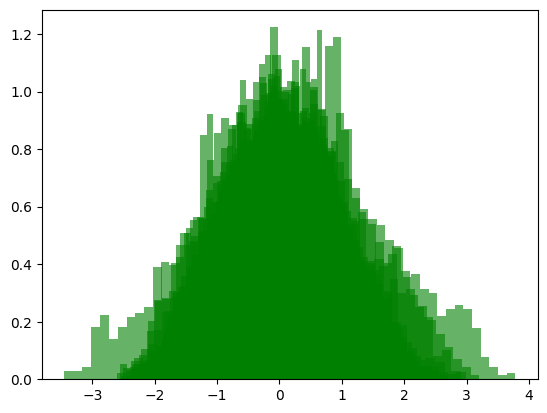

In [48]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

for i in facial_vectors:
    
    data = facial_vectors[i]

    mu, std = norm.fit(data)

    plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 1009)
    p = norm.pdf(x, mu, std)
    corr_matrix = np.corrcoef(data,p)
    corr = corr_matrix[0,1]
    R_sq = 1-corr**2
    rs.append(R_sq)

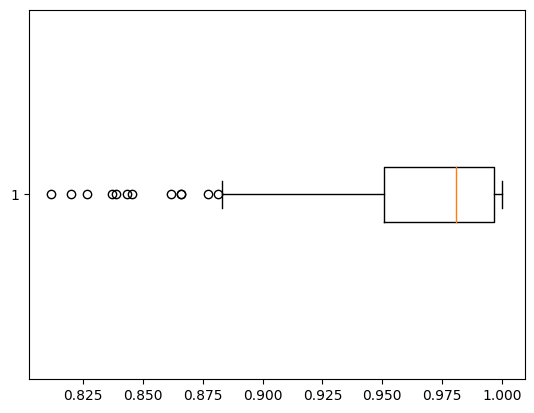

In [37]:
x=[i/128 for i in range(0,128)]
y = rs
import matplotlib.pyplot as plt
plt.boxplot(rs,vert = False)
plt.show()

In [31]:
len(rs)

128

(1009,)


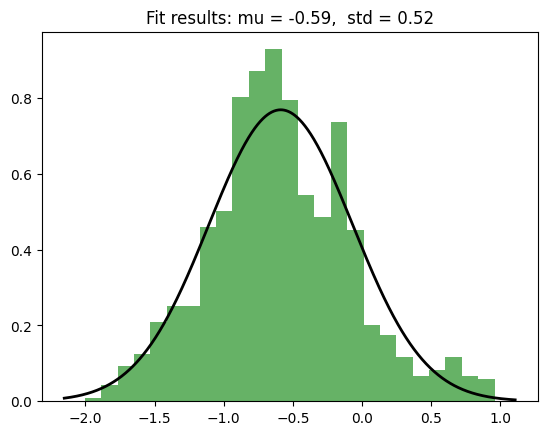

(1009,)

In [50]:
data = facial_vectors['-0.508257']

mu, std = norm.fit(data)

plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1009)
p = norm.pdf(x, mu, std)
corr_matrix = np.corrcoef(data,p)
corr = corr_matrix[0,1]
R_sq = 1-corr**2
rs.append(R_sq)
print(p.shape)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.show()
data.shape